# House Price Data

## Importamos la librería a usar

In [1]:
import pandas as pd

## Importamos el dataset

In [2]:
df = pd.read_csv('housepricedata.csv' )

## Mostramos el dataset


In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1
7,10382,7,6,1107,2,1,3,7,2,484,1
8,6120,7,5,952,2,0,2,8,2,468,0
9,7420,5,6,991,1,0,2,5,2,205,0


## Tomamos solo los valores de dataset

In [4]:
dataset = df.values

## Tomamos X el valor de las primeras 9 columnas y todas las filas

In [5]:
X = dataset[:,0:10]

## Tomamos Y el valor de la columna 10 y todas las filas

In [6]:
Y = dataset[:,10]

## Normalizamos los datos: normalizamos los datos de la variable X llevandolo en escala del 0 al 1.

In [7]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

/home/manuelalejandro/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.0334198 ,  0.66666667,  0.5       , ...,  0.5       ,
         0.        ,  0.3864598 ],
       [ 0.03879502,  0.55555556,  0.875     , ...,  0.33333333,
         0.33333333,  0.32440056],
       [ 0.04650728,  0.66666667,  0.5       , ...,  0.33333333,
         0.33333333,  0.42877292],
       ..., 
       [ 0.03618687,  0.66666667,  1.        , ...,  0.58333333,
         0.66666667,  0.17771509],
       [ 0.03934189,  0.44444444,  0.625     , ...,  0.25      ,
         0.        ,  0.16925247],
       [ 0.04037019,  0.44444444,  0.625     , ...,  0.33333333,
         0.        ,  0.19464034]])

## Dividimos los datos para entrenamiento, validación y test

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [9]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

## Mostramos las dimensiones de las variables de entrenamiento, validacion y test

In [10]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


## Red Neuronal:
* Modelo sequencial para que este totalmente conectada
* Primera capa densa, 32 neuronas, función de activación "relu" y la primera capa con 10 neuronas 
* Segunda capa densa, 32 neuronas, función de activación "relu"
* Tercera capa densa, 1 neurona, función de activación "sigmoid"

In [11]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

Using TensorFlow backend.


## Compilamos el modelo, optimizador "sgd", función de perdida "binary_crossentropy", métrica "accuracy"

In [12]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Entrenamos el modelo con 100 epochs

In [13]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 830us/step - loss: 0.6564 - acc: 0.7299 - val_loss: 0.6434 - val_acc: 0.7900
Epoch 2/100
1022/1022 [==============================] - 0s 97us/step - loss: 0.6471 - acc: 0.7485 - val_loss: 0.6353 - val_acc: 0.7900
Epoch 3/100
1022/1022 [==============================] - 0s 105us/step - loss: 0.6390 - acc: 0.7622 - val_loss: 0.6279 - val_acc: 0.7900
Epoch 4/100
1022/1022 [==============================] - 0s 106us/step - loss: 0.6315 - acc: 0.7671 - val_loss: 0.6209 - val_acc: 0.8037
Epoch 5/100
1022/1022 [==============================] - 0s 101us/step - loss: 0.6243 - acc: 0.7632 - val_loss: 0.6152 - val_acc: 0.8037
Epoch 6/100
1022/1022 [==============================] - 0s 98us/step - loss: 0.6171 - acc: 0.7750 - val_loss: 0.6091 - val_acc: 0.8128
Epoch 7/100
1022/1022 [==============================] - 0s 88us/step - loss: 0.6098 - acc: 0.7984 - val_loss: 0.6016 - val_acc: 0.81

1022/1022 [==============================] - 0s 80us/step - loss: 0.3095 - acc: 0.8748 - val_loss: 0.3181 - val_acc: 0.8721
Epoch 61/100
1022/1022 [==============================] - 0s 92us/step - loss: 0.3080 - acc: 0.8718 - val_loss: 0.3177 - val_acc: 0.8767
Epoch 62/100
1022/1022 [==============================] - 0s 69us/step - loss: 0.3063 - acc: 0.8728 - val_loss: 0.3164 - val_acc: 0.8767
Epoch 63/100
1022/1022 [==============================] - 0s 74us/step - loss: 0.3048 - acc: 0.8708 - val_loss: 0.3151 - val_acc: 0.8767
Epoch 64/100
1022/1022 [==============================] - 0s 78us/step - loss: 0.3039 - acc: 0.8738 - val_loss: 0.3154 - val_acc: 0.8767
Epoch 65/100
1022/1022 [==============================] - 0s 76us/step - loss: 0.3021 - acc: 0.8748 - val_loss: 0.3167 - val_acc: 0.8630
Epoch 66/100
1022/1022 [==============================] - 0s 75us/step - loss: 0.3021 - acc: 0.8718 - val_loss: 0.3136 - val_acc: 0.8721
Epoch 67/100
1022/1022 [==============================

## Perdida en escala del 0 al 1

In [16]:
model.evaluate(X_test, Y_test)[0] 

219/219 [==============================] - 0s 74us/step


0.31655826525056741

## Acierto en escala del 0 al 1-

In [17]:
model.evaluate(X_test, Y_test)[1] # The accuracy


219/219 [==============================] - 0s 67us/step


0.89497717167144497

## Graficamos perdida vs Epoch

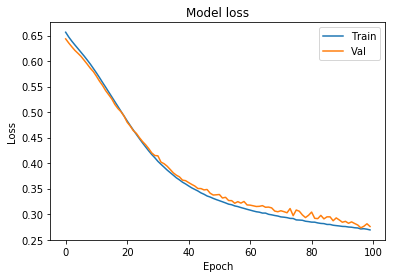

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

## Graficamos aciertos vs Epoch

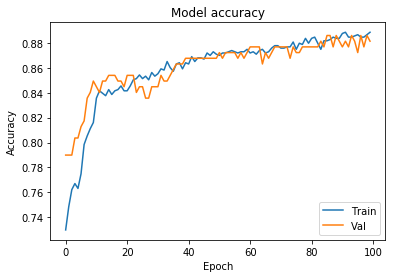

In [20]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()